<a href="https://colab.research.google.com/github/DeepigaLoganathamoorthy/courses/blob/master/Project_Group_2_Covid19_andwell_balanced_diet_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>















##**The impacts of a well-balanced diet on immunity in combating the COVID-19 virus in various countries**




#**Questions:**
1. How many countries adhere to the health authorities' recommendations to consume at least 40% vegetables for a balanced diet?
2. How is the current death and total cases in countries that consume recommended amount of vegetables for their daily intakes as compare to those that doesn't follow the recommendation?
3. Compare different machine learning models to identify the predictive COVID-19 trends in countries where sufficient vegetables is consumed or vice versa?

#**Overview & Motivation:**

The COVID-19 pandemic has resulted in significant fatalities around the globe, and it poses an enormous threat to public health, food systems, and the industry. To combat the virus, it is vital to achieve and maintain a healthy nutritional state. Individuals' nutritional status has been utilised as a destabilisation buffer during the COVID-19 pandemic. Since optimal nutrition and dietary nutrient intake have an impact on the immune system, boosting immunity is now the only method to survive in the present circumstance. Apart from Vitamin C, which is among the best ways to strengthen the immune system, there is no clear information that supplements can recover immunity. **This project represents the statistical data of various countries that adhere to a balanced diet as suggested by health officials to consume 40% vegetables, along with their COVID-19 cases and dietary reference consumption trends. Furthermore, it also forecasts COVID-19 patterns in countries where adequate dietary advice is consumed.**




#**Literature:**
1.Worldwide more than 100 countries have developed or are currently developing food-based dietary guidelines, with many revised at least once regional guidelines also exist,for example, the guide promoting a healthy diet for the WHC Eastern Mediterranean region.(Cuiyan Wang et al., 2021) Most countries in Asia and the Pacific, Europe North America. Latin America and the Caribbean have national dietary guidelines. Food-based dietary guidelines have also been developed in a few countries in Africa and the Near East. The country materials on this site were produced by national expert committees and have been republished with permission of the owner. FAO has not modified them and does not necessarily endorse the views expressed in the documents permission for further use of materials should be obtained from the copyright holder(Rice University. 2020).

2.During lockdown people tended to reduce their intake of fresh food during lockdown, particularly fruits, vegetables and meat. People across the three countries(Denmark, Germany and Slovenia) shopped less frequently during lockdown and there was an overall reduction in the consumption of fresh foods, but an increase in the consumption of food with a longer shelf life in Denmark and Germany.

3.While no foods or dietary supplements can prevent or cure COVID-19 infection, healthy diets are important for supporting immune systems. Smoking habits have been reduced during the lockdown.(Thomas K. F. Chiu et al., 2021)

#**Dataset**

#1. Food intake Data Set

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Supply_Food_Data_Descriptions.csv to Supply_Food_Data_Descriptions.csv
Saving Food_Supply_Quantity_kg_Data.csv to Food_Supply_Quantity_kg_Data.csv


**Explore Data set :**
We will be using Pandas library from python to exploere, cleaning and processing the data set

In [ ]:
import pandas as pd
foodIntakeData = pd.read_csv('Food_Supply_Quantity_kg_Data.csv')
foodIntakeData.head(5)

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,0.0728,0.2057,0.0700,0.2953,0.0574,0.8802,0.3078,1.3489,0.0,0.0770,0.5345,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,0.1123,0.2324,0.9377,0.2380,0.0008,1.8096,0.1055,1.5367,0.0,0.1515,0.3261,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,0.1671,0.0870,0.3493,0.4783,0.0557,4.1340,0.2216,1.8342,0.0,0.1152,1.0310,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,0.1165,0.1550,0.4186,0.6507,0.0009,18.1102,0.0508,1.8495,0.0,0.0061,0.6463,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,0.7139,0.2219,0.2172,0.1840,0.1524,1.4522,0.1564,3.8749,0.0,0.0253,0.8102,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [ ]:
# Getting the shape of data set to know the size and columns of the data set
print('The shape of our dataset is:', foodIntakeData.shape)
# From the results, there are 170 rows and total 32 columns in the data set 

The shape of our dataset is: (170, 32)


In [ ]:
# Get a summary of the dataset to know the anomalies in our dataset so we can clean it before sending it to our models
foodIntakeData.describe()

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Confirmed,Deaths,Recovered,Active,Population
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,167.000000,164.000000,164.000000,164.000000,162.000000,1.700000e+02
mean,3.022971,0.221064,12.181871,0.013994,11.800347,0.470570,1.387195,5.621405,3.375934,6.519776,0.443122,0.193435,0.818120,0.537131,0.091011,5.335371,0.201946,2.799115,0.095846,0.117474,0.851554,6.085912,37.814834,18.707784,2.021972,0.039370,1.452356,0.535158,4.452364e+07
std,2.382243,0.278304,5.852635,0.129382,5.824870,0.331209,1.257382,3.152849,1.762911,5.020379,0.685727,0.159634,1.772273,0.601111,0.121898,5.571355,0.189239,1.545951,0.379936,0.146143,0.445335,3.560148,5.852943,9.633557,2.360454,0.048718,1.927617,1.329249,1.564182e+08
min,0.000000,0.001000,1.739100,0.000000,3.401400,0.023900,0.034200,0.659600,0.356000,0.096300,0.000000,0.000000,0.009800,0.000000,0.000000,0.679600,0.004200,0.366600,0.000000,0.000000,0.091500,0.857000,23.113200,2.100000,0.000312,0.000000,0.000000,0.000000,5.400000e+04
25%,0.895625,0.040225,7.236850,0.000000,7.226850,0.187575,0.557100,3.541950,1.891475,2.172250,0.032325,0.105050,0.134075,0.129650,0.016500,2.023825,0.083325,1.721025,0.000000,0.020750,0.507700,3.616500,33.552775,8.500000,0.140976,0.002013,0.099107,0.012028,2.816250e+06
50%,2.866150,0.116850,12.097550,0.000000,10.142750,0.460150,1.029250,5.021250,3.424750,5.336900,0.196850,0.166800,0.326650,0.300800,0.042550,3.108650,0.159450,2.601650,0.000000,0.079950,0.774450,5.028100,37.900700,21.200000,1.011570,0.011998,0.475402,0.081040,1.018150e+07
75%,4.710950,0.253900,16.444125,0.001400,15.148950,0.644150,1.821275,6.827750,4.422450,10.407100,0.583625,0.228575,0.691675,0.734900,0.123150,5.745875,0.261800,3.782150,0.000000,0.148650,1.070900,7.801650,42.762775,25.700000,3.487069,0.069503,2.622874,0.358183,3.271625e+07
max,15.370600,1.355900,26.886500,1.679400,29.804500,1.696000,8.795900,19.302800,8.170000,20.837800,3.663400,1.225600,12.176300,3.483800,0.662600,27.712800,1.282300,9.725900,3.067700,0.756900,2.202600,19.299500,48.258500,45.600000,10.408199,0.185428,9.039871,8.019819,1.402385e+09


In [ ]:
# Another way to check for NaN or null is using isnull() method
foodIntakeData.isnull()

# we can again see that undernourished have some NaN or Null values that we need to addressed before proceeding with next steps

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
166,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
167,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
168,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


To pre process and remove extra columns from the data set that are not required, we first have to undersatnd the dataset. We will grab all the details about the each column and after getting the details about each column we will remove unnecessary details from our dataset.

In [ ]:
import pandas as pd
foodIntakeDataDesc = pd.read_csv('Supply_Food_Data_Descriptions.csv')
foodIntakeDataDesc

,Categories,Items
0,Alcoholic Beverages,"Alcohol, Non-Food; Beer; Beverages, Alcoholic;..."
1,Animal fats,"Butter, Ghee; Cream; Fats, Animals, Raw; Fish,..."
2,Animal Products,"Aquatic Animals, Others; Aquatic Plants; Bovin..."
3,"Aquatic Products, Other","Aquatic Animals, Others; Aquatic Plants; Meat,..."
4,Cereals - Excluding Beer,"Barley and products; Cereals, Other; Maize and..."
5,Eggs,Eggs
6,"Fish, Seafood",Cephalopods; Crustaceans; Demersal Fish; Fresh...
7,Fruits - Excluding Wine,"Apples and products; Bananas; Citrus, Other; D..."
8,Meat,"Bovine Meat; Meat, Other; Mutton & Goat Meat; ..."
9,Milk - Excluding Butter,Milk - Excluding Butter


From the list above we will be interested in following items:


*   Proteins (Meat, Fish Seafood, Eggs)
*   Vegetables (Vegetables)
*   Fruits (Fruits)
*   Grains (Cereals - Excluding Beer) 









In [ ]:
foodIntakeNewDf = foodIntakeData[['Country', 'Meat','Fish, Seafood','Eggs','Vegetables', 'Fruits - Excluding Wine','Cereals - Excluding Beer', 'Obesity', 'Population', 'Confirmed', 'Deaths', 'Recovered']].copy()
foodIntakeNewDf.head(5)

,Country,Meat,"Fish, Seafood",Eggs,Vegetables,Fruits - Excluding Wine,Cereals - Excluding Beer,Obesity,Population,Confirmed,Deaths,Recovered
0,Afghanistan,1.2020,0.0350,0.2099,6.7642,5.3495,24.8097,4.5,38928000.0,0.142134,0.006186,0.123374
1,Albania,1.8845,0.2126,0.5815,11.7753,6.7861,5.7817,22.3,2838000.0,2.967301,0.050951,1.792636
2,Algeria,1.1305,0.2416,0.5277,11.6484,6.3801,13.6816,26.6,44357000.0,0.244897,0.006558,0.167572
3,Angola,2.0571,1.7707,0.0587,2.3041,6.0005,9.1085,6.8,32522000.0,0.061687,0.001461,0.056808
4,Antigua and Barbuda,5.6888,4.1489,0.2274,5.4495,10.7451,5.9960,19.1,98000.0,0.293878,0.007143,0.190816


In [ ]:
foodIntakeNewDf['Proteins'] = foodIntakeNewDf.iloc[:,-11:-8].sum(axis=1)
foodIntakeNewDf.drop(['Meat', 'Fish, Seafood','Eggs'], axis = 1, inplace=True)
foodIntakeNewDf.rename(columns={'Fruits - Excluding Wine': 'Fruits', 'Cereals - Excluding Beer': 'Grains'}, inplace=True)
cols = list(foodIntakeNewDf)
cols.insert(1, cols.pop(cols.index('Proteins')))
foodIntakeNewDf = foodIntakeNewDf.loc[:, cols]
foodIntakeNewDf['Others'] = 100.0000 - foodIntakeNewDf.iloc[:,-9:-5].sum(axis=1)
cols = list(foodIntakeNewDf)
cols.insert(5, cols.pop(cols.index('Others')))
foodIntakeNewDf = foodIntakeNewDf.loc[:, cols]
foodIntakeNewDf.drop(['Proteins', 'Fruits', 'Grains', 'Others', 'Population','Confirmed','Deaths', 'Recovered'], axis = 1, inplace=True)
foodIntakeNewDf.head(5)


,Country,Vegetables,Obesity
0,Afghanistan,6.7642,4.5
1,Albania,11.7753,22.3
2,Algeria,11.6484,26.6
3,Angola,2.3041,6.8
4,Antigua and Barbuda,5.4495,19.1


In [ ]:
# Check the null values
foodIntakeNewDf.isnull().sum()

Country       0
Vegetables    0
Obesity       3
dtype: int64

In [ ]:
# Replace all NaN values to its mean
foodIntakeNewDf.fillna(foodIntakeNewDf.mean(), inplace=True)
foodIntakeNewDf.isnull().sum()


Country       0
Vegetables    0
Obesity       0
dtype: int64

Above is the pre processed dataset that we will be using to eveluate which countries have more vegetables intake and how it reflects with Covid-19 cases or deaths

#2. Scraping Latest Worldometer Covid data

As we couldn't find any realiable latest covid data, 
so we are scraping from  https://www.worldometers.info/coronavirus/ 

In [ ]:
from bs4 import BeautifulSoup
import requests as req    
import pandas as pd
import os
from datetime import date

# getting worldometer data
contents = req.get("https://www.worldometers.info/coronavirus/")
res=[]
soup = BeautifulSoup(contents.text, 'lxml')
table = soup.find_all('table')[1]
table_rows = table.find_all('tr')
data_row=pd.DataFrame()
for tr in table_rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    if(len(row)>0):
        res.append(row) 

# Formatting Data

column_dict = {1:'Country',2:'Total cases',3:'New Cases',4:'Total Deaths',5:'New Deaths',6:'Total Recovered',\
               7:'New Recovered',8:'Active cases',9:'Serious,Critical',10:'Tot cases 1M pop',11:'Death 1M pop',\
               12:'Total Tests',13:'Tests 1M pop',14:'Population'}

# pd.set_option("display.max_rows", None, "display.max_columns", None)
tmp_df = pd.DataFrame(res)
tmp_df = tmp_df[tmp_df[0] != ''].reset_index()
tmp_df.drop(['index', 0,15,16,17,18,19,20,21], axis = 1, inplace=True)
tmp_df.rename(columns=column_dict, inplace=True)
tmp_df.to_csv('covid_19_country_data.csv',index=False)

In [ ]:
import pandas as pd
# foodIntakeData = pd.read_csv('Food_Supply_Quantity_kg_Data.csv')
covidCountryDataSet = pd.read_csv('/content/covid_19_country_data.csv')
covidCountryDataSet.head(5)


,Country,Total cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active cases,"Serious,Critical",Tot cases 1M pop,Death 1M pop,Total Tests,Tests 1M pop,Population
0,China,"105,811",+62,"4,636",NaN,"98,814",+188,"2,361",7,74,3,"160,000,000","111,163","1,439,323,776"
1,USA,"74,695,333","+497,351","902,140","+2,689","45,614,212","+192,894","28,178,981","25,189","223,604","2,701","894,319,678","2,677,193","334,051,237"
2,India,"40,622,709","+251,209","492,356",+627,"38,024,771","+347,443","2,105,582","8,944","28,989",351,"722,166,248","515,351","1,401,309,721"
3,Brazil,"24,782,922","+228,972","625,169",+662,"22,098,157","+61,989","2,059,596","8,318","115,306","2,909","63,776,166","296,727","214,932,449"
4,France,"18,122,724","+392,168","130,015",+268,"11,381,705","+327,956","6,611,004","3,760","276,681","1,985","223,502,325","3,412,229","65,500,398"


In [ ]:
# Getting the shape of data set to know the size and columns of the data set
print('The shape of our dataset is:', covidCountryDataSet.shape)
# From the results, there are 224 rows and total 14 columns in the data set 

The shape of our dataset is: (225, 14)


In [ ]:
# Get a summary of the dataset to know the anomalies in our dataset so we can clean it before sending it to our models
covidCountryDataSet.describe()



,Country,Total cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active cases,"Serious,Critical",Tot cases 1M pop,Death 1M pop,Total Tests,Tests 1M pop,Population
count,225,225,185,225,135,216,152,217,161,223,212,209,209,225
unique,225,223,174,211,60,214,146,210,109,222,195,209,209,224
top,Malaysia,7,+15,,+2,1,+35,0,7,9,65,"2,794,262","12,177,789",
freq,1,2,3,11,20,2,3,8,8,2,3,1,1,2


In [ ]:
# We will verify if there is any rows having non number type of data which is not expected in our case using isreal method
 
import numpy as np
covidCountryDataSet.applymap(np.isreal)

# Undernourished column does have some values that are non numeric which is NaN or null


,Country,Total cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active cases,"Serious,Critical",Tot cases 1M pop,Death 1M pop,Total Tests,Tests 1M pop,Population
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,False,False,True,False,True,False,True,False,True,False,False,False,False,False
221,False,False,True,False,True,False,True,False,True,False,True,True,True,False
222,False,False,True,False,True,False,True,False,True,False,True,True,True,False
223,False,False,True,False,True,False,True,False,True,False,True,True,True,False


In [ ]:
#Counting Null values in every column 
covidCountryDataSet.isnull().sum(axis = 0)

Country              0
Total cases          0
New Cases           40
Total Deaths         0
New Deaths          90
Total Recovered      9
New Recovered       73
Active cases         8
Serious,Critical    64
Tot cases 1M pop     2
Death 1M pop        13
Total Tests         16
Tests 1M pop        16
Population           0
dtype: int64

In [ ]:

# Another way to check for NaN or null is using isnull() method
covidCountryDataSet.isnull()

# we can again see that undernourished have some NaN or Null values that we need to addressed before proceeding with next steps

,Country,Total cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active cases,"Serious,Critical",Tot cases 1M pop,Death 1M pop,Total Tests,Tests 1M pop,Population
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,False,False,True,False,True,False,True,False,True,False,False,False,False,False
221,False,False,True,False,True,False,True,False,True,False,True,True,True,False
222,False,False,True,False,True,False,True,False,True,False,True,True,True,False
223,False,False,True,False,True,False,True,False,True,False,True,True,True,False


In [ ]:
## Cleanig the covid dataset
#Droping the unnecessary Column
covidCountryDataSet.drop(['New Cases', 'New Deaths', 'New Recovered','Serious,Critical','Tot cases 1M pop', 'Death 1M pop','Tests 1M pop','Total Tests'], axis = 1, inplace=True)
#Renaming to understand easily
covidCountryDataSet.rename(columns={'Total cases':'total_covid_cases','Total Deaths':'total_covid_deaths','Total Recovered':'total_covid_recovered',\
                                    'Active cases':'active_covid_cases',}, inplace=True)
covidCountryDataSet = covidCountryDataSet.sort_values('Country',ascending=1)
covidCountryDataSet.head() 


,Country,total_covid_cases,total_covid_deaths,total_covid_recovered,active_covid_cases,Population
107,Afghanistan,"161,009","7,403","146,454","7,152","40,303,705"
95,Albania,"254,126","3,329","227,629","23,168","2,872,860"
99,Algeria,"245,698","6,539","163,895","75,264","45,093,722"
150,Andorra,"35,028",145,"30,112","4,771","77,459"
120,Angola,"97,901","1,893","92,296","3,712","34,468,985"


In [ ]:
#Again Counting Null values in every column 
covidCountryDataSet.isnull().sum(axis = 0)

Country                  0
total_covid_cases        0
total_covid_deaths       0
total_covid_recovered    9
active_covid_cases       8
Population               0
dtype: int64

In [ ]:
#as there are very few null values, thats why droping them
covidCountryDataSet.dropna(inplace=True)
covidCountryDataSet.head()

,Country,total_covid_cases,total_covid_deaths,total_covid_recovered,active_covid_cases,Population
107,Afghanistan,"161,009","7,403","146,454","7,152","40,303,705"
95,Albania,"254,126","3,329","227,629","23,168","2,872,860"
99,Algeria,"245,698","6,539","163,895","75,264","45,093,722"
150,Andorra,"35,028",145,"30,112","4,771","77,459"
120,Angola,"97,901","1,893","92,296","3,712","34,468,985"


In [ ]:
#final shape of covid dataset
covidCountryDataSet.shape

(216, 6)

In [ ]:
## merging covid datset and food intake data set with focusing on country name
merged_df = pd.merge(covidCountryDataSet,foodIntakeNewDf,how='inner',on='Country')

#Droping the raw which have null values
merged_df.dropna(inplace=True)

merged_df.head()

,Country,total_covid_cases,total_covid_deaths,total_covid_recovered,active_covid_cases,Population,Vegetables,Obesity
0,Afghanistan,"161,009","7,403","146,454","7,152","40,303,705",6.7642,4.5
1,Albania,"254,126","3,329","227,629","23,168","2,872,860",11.7753,22.3
2,Algeria,"245,698","6,539","163,895","75,264","45,093,722",11.6484,26.6
3,Angola,"97,901","1,893","92,296","3,712","34,468,985",2.3041,6.8
4,Antigua and Barbuda,"6,524",127,"5,617",780,"99,202",5.4495,19.1


In [ ]:
# Getting the shape of data set to know the size and columns of the data set
print('The shape of our Marged dataset is:', merged_df.shape)


The shape of our Marged dataset is: (149, 8)


In [ ]:
#Checking if there any null value in this final merged dataset
merged_df.isnull().sum(axis = 0)

Country                  0
total_covid_cases        0
total_covid_deaths       0
total_covid_recovered    0
active_covid_cases       0
Population               0
Vegetables               0
Obesity                  0
dtype: int64

Converting few columns to Float  type for plotting


In [ ]:

merged_df["active_covid_cases"] = merged_df["active_covid_cases"].str.replace(',', '').astype(float)
merged_df["total_covid_cases"] = merged_df["total_covid_cases"].str.replace(',', '').astype(float)
merged_df["total_covid_recovered"] = merged_df["total_covid_recovered"].str.replace(',', '').astype(float)



In [ ]:

merged_df['total_covid_deaths'].replace(['', ' '], '0', inplace=True)
merged_df['total_covid_deaths'] = merged_df['total_covid_deaths'].str.replace(',', '').astype(float)

In [ ]:
dataTypeSeries = merged_df.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
Country                   object
total_covid_cases        float64
total_covid_deaths       float64
total_covid_recovered    float64
active_covid_cases       float64
Population                object
Vegetables               float64
Obesity                  float64
dtype: object


Here we have the final cleaned data set without any null values, which we can use to run models.

# **Exploratory Data Analysis**

Loading several helpful packages for visualization


In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.express as px

import os
print("Setup Complete")


Setup Complete


Installing pycountry

In [ ]:
pip install pycountry

     |████████████████████████████████| 10.1 MB 7.7 MB/s 
  Created wheel for pycountry: filename=pycountry-22.1.10-py2.py3-none-any.whl size=10595784 sha256=46fcf1cfb51314198c2f4af49e562d20a3724a17a13fb1ca04ca11298b850ec4
  Stored in directory: /root/.cache/pip/wheels/f7/8f/9c/b070d7376caf2beb0685bf72578106b2fd57019ed57d84f126
Successfully built pycountry


In [ ]:
import pycountry

exceptions = []

def get_alpha_3_code(cou):
    try:
        return pycountry.countries.search_fuzzy(cou)[0].alpha_3
    except:
        exceptions.append(cou)


merged_df['iso_alpha'] = merged_df['Country'].apply(lambda x : get_alpha_3_code(x))

# removeing exceptions
for exc in exceptions:
    merged_df = merged_df[worldometer['Country']!=exc]
    
    
fig = px.scatter_geo(merged_df, locations="iso_alpha",
                     color="Country", # which column to use to set the color of markers
                     hover_name="Country", # column added to hover information
                     size="total_covid_cases", # size of markers
                     projection="orthographic")
fig

Here, we are showing the active covid cases of each country. Size of markers is related to the number of total covid cases. 




**List of top 10 countries who consume highest percentage of vegetables**




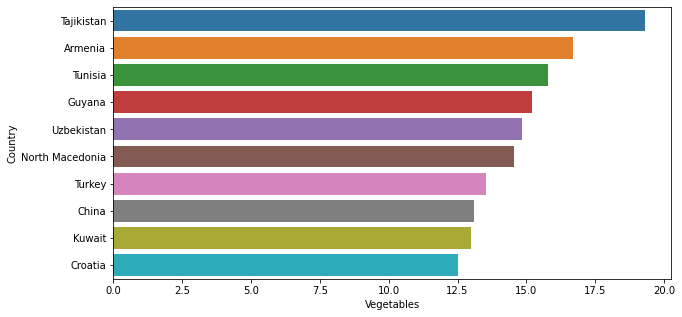

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

merged_df.sort_values(by='Vegetables', ascending=False, inplace=True)
sns.barplot( x="Vegetables", y="Country", data=merged_df[:10]);



It can be seen in the bar chart that none of the countries consume 40% of vegetables which is recommended for a balanced diet. Tajikistan's people consume almost 20% of vegetables which is the highest. 


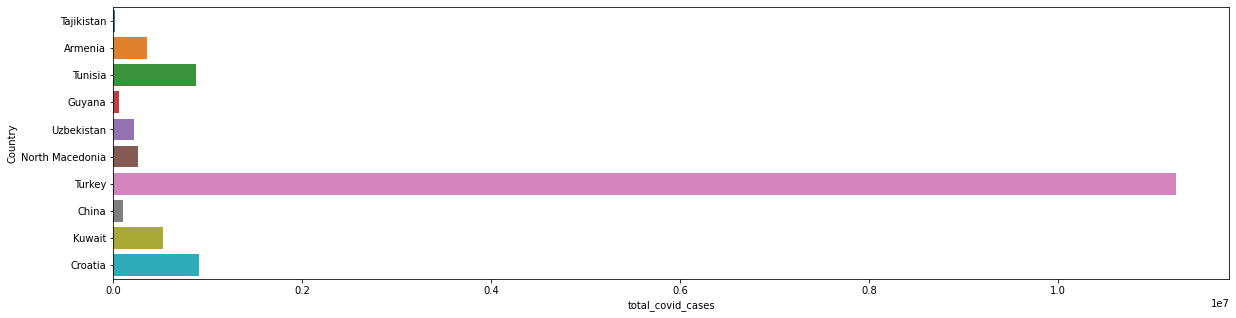

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))

merged_df.sort_values(by='Vegetables', ascending=False, inplace=True)
sns.barplot(x="total_covid_cases", y="Country", data=merged_df[:10]);

 
Here we are showing the total number of covid cases of those top 10 vegetable consumed countries. We can notice that Turkey is the country with the highest number of covid cases and other country's confirmed covid cases are under 10 million.



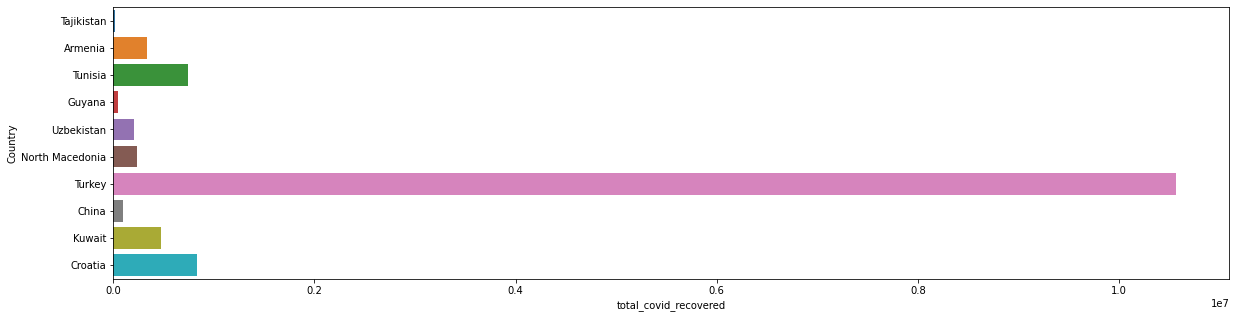

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))

merged_df.sort_values(by='Vegetables', ascending=False, inplace=True)
sns.barplot(x="total_covid_recovered", y="Country", data=merged_df[:10]);

**List of 10 countries who consume lowest percentage of vegetables**

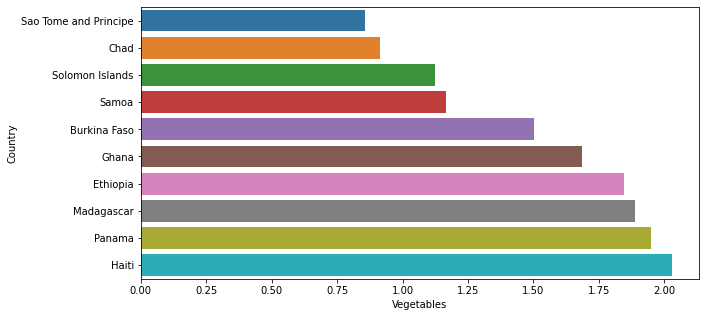

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

merged_df.sort_values(by='Vegetables', ascending=True, inplace=True)
sns.barplot( x="Vegetables", y="Country", data=merged_df[:10]);

This bar chart illustrates the ten countries who consume the least amount of vegetables. It can be seen that a country called Sao Tome and Principe's people consume the least, which is less than 1% of vegetables.

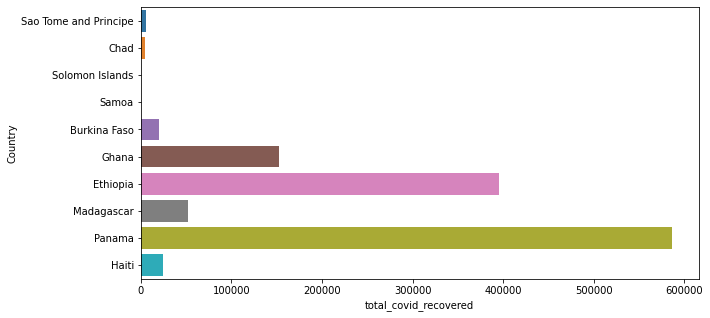

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

merged_df.sort_values(by='Vegetables', ascending=True, inplace=True)
sns.barplot(x="total_covid_recovered", y="Country", data=merged_df[:10]);

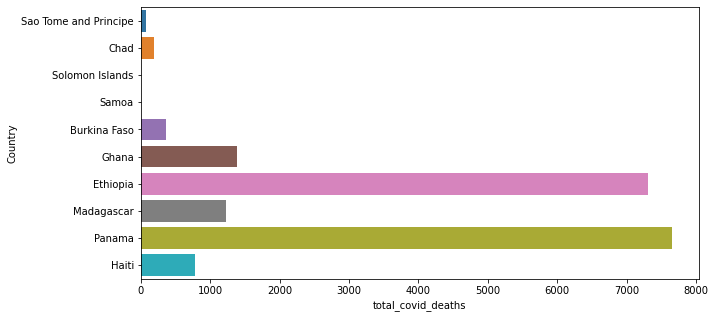

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

merged_df.sort_values(by='Vegetables', ascending=True, inplace=True)
sns.barplot(x="total_covid_deaths", y="Country", data=merged_df[:10]);

This bar graph shows the covid deaths of those countries and we can notice that the number of covid deaths is under ten thousands. Also countries called samoa and solomon islands have no deaths due to Covid. 

**List of The Countries With the Highest COVID-19 Death and percentage of consumed vegetables**

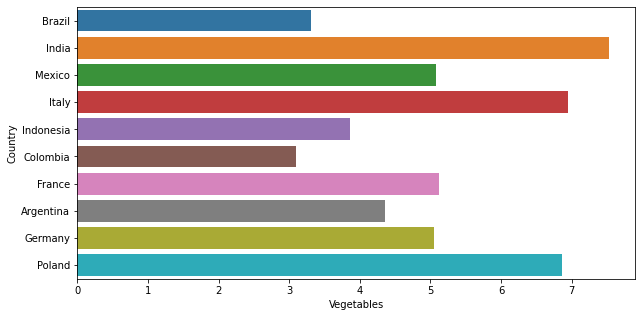

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

merged_df.sort_values(by='total_covid_deaths', ascending=False, inplace=True)
sns.barplot(x="Vegetables", y="Country", data=merged_df[:10]);

It can be seen that the Countries With the Highest COVID-19 Death toll consumed a very little amount of vegetables in their daily diet which was only under almost 8%.

**Top ten countries by total recovered from covid-19 and  Veggies consumption %**

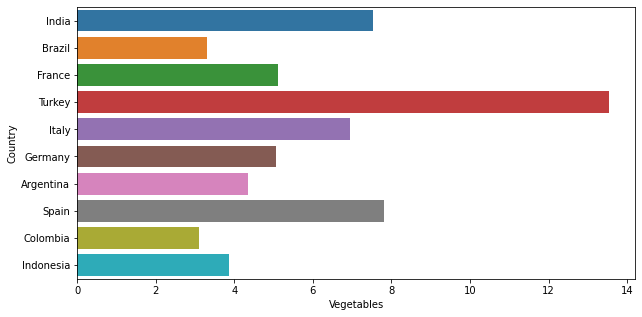

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

merged_df.sort_values(by='total_covid_recovered', ascending=False, inplace=True)
sns.barplot(x="Vegetables", y="Country", data=merged_df[:10]);


Here we are showing the top ten countries by total recovered from covid-19 and the percentage of vegetable consumption . An interesting fact can be noticed that Turkey was one the highest vegetable consuming countries which is up to almost 14%. So we can say that, daily a good amount of vegetable consumption plays a great role in recovery.     



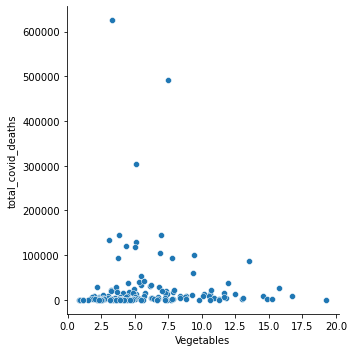

In [ ]:
sns.relplot(x="Vegetables", y="total_covid_deaths", data=merged_df);


This scatterplot shows the correlation between  total covid death and the percentage of consumed vegetables. We can see that if vegetables intake increases  then the number of total covid cases will decrease. 


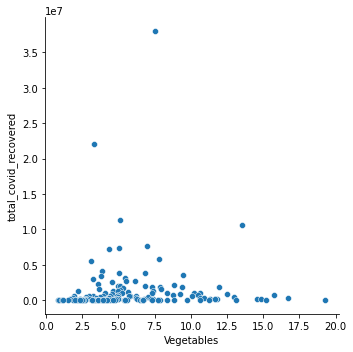

In [ ]:
sns.relplot(x="Vegetables", y="total_covid_recovered", data=merged_df);


This scatterplot shows the correlation between total covid recovered and the percentage of consumed vegetables. We can see that if vegetables intake increases  then the number of total covid recovery will increase.  

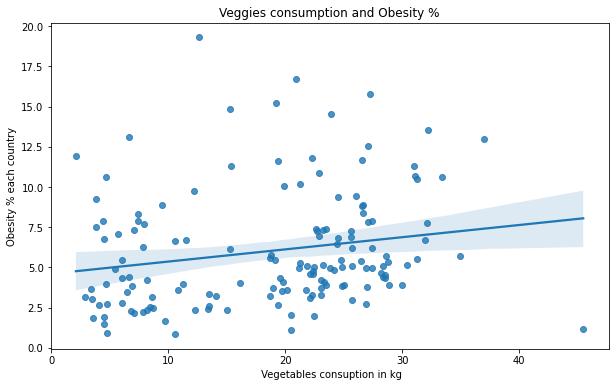

In [ ]:
##With Regression Line

plt.figure(figsize=(10,6))

sns.regplot(x=merged_df['Obesity'], y=merged_df['Vegetables'])

plt.ylabel("Obesity % each country")

plt.xlabel(" Vegetables consuption in kg")
plt.title("Veggies consumption and Obesity %")
plt.savefig('output.png', dpi=300)

Here it can be  seen that if vegetables consumption increases, Obesity will decrease. The countries with the most obesity rate seem to consume less vegetables than people on average.

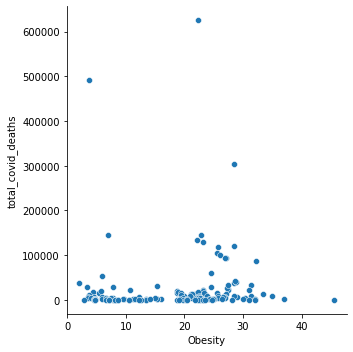

In [ ]:
sns.relplot(x="Obesity", y="total_covid_deaths", data=merged_df);


Deaths patients have a stronger correlation with Obesity


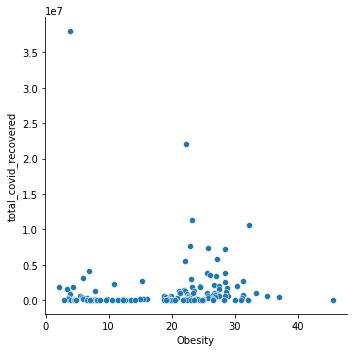

In [ ]:
sns.relplot(x="Obesity", y="total_covid_recovered", data=merged_df);


Here we can notice that if Obesity increases , the chance of recovery from covid will decrease. 

**Healthy Diet vs Covid**

In [ ]:

import plotly.figure_factory as ff
corr_heatmap=merged_df[['total_covid_cases','Obesity','total_covid_recovered','Vegetables','total_covid_deaths']]
x=corr_heatmap.corr(method='pearson').round(3)
ff.create_annotated_heatmap(z=x.values, x=x.columns.to_list(), y=x.columns.to_list(), colorscale="BuPu", showscale=True)

Indeed, we can now see that Recovery has a stronger correlation with Vegetables consumption than Obesity. On the other hand Deaths patients have a stronger correlation with Obesity than Vegetables consumption. 




**This could mean that in average, patients who take good amount of vegetables in their diet is are most likely to recover from covid while obese patients are most likely to die.**

In [ ]:
#Dataset, Covid daily cases RAW data from 31/12/2019 till 14/12/2020

!pip install pycountry
import pycountry
import plotly.express as px
import pandas as pd

URL_DATASET = r'https://raw.githubusercontent.com/muhammad-umair-malik-git/covid-data/main/COVID-19-geographic-disbtribution-worldwide-2020-12-14.csv'

covid_daily_cases = pd.read_csv(URL_DATASET)
covid_daily_cases.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
0,14/12/2020,14,12,2020,746,6,Afghanistan
1,13/12/2020,13,12,2020,298,9,Afghanistan
2,12/12/2020,12,12,2020,113,11,Afghanistan
3,11/12/2020,11,12,2020,63,10,Afghanistan
4,10/12/2020,10,12,2020,202,16,Afghanistan


Install packages

In [ ]:
pip install -U scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics


#**Machine Learning**

Randomforest machine leanring model

In [ ]:
def splitdataset(country) :
  plt.rcParams['figure.figsize'] = (20,10)
  dftemp=covid_daily_cases.set_index('dateRep')
  grouped = dftemp.groupby('countriesAndTerritories')

  df = pd.DataFrame()
  for name, group in grouped:
    if name==country:
      df = group
  df.info()
  df = df[['day', 'month', 'year', 'cases','deaths']]
  df = df.iloc[::-1]
  X = df.drop('deaths', axis=1)
  Y = df['deaths']
  X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.3, random_state = 100)
  return X, Y, X_train, X_test, y_train, y_test
def RandomForest(X_train, X_test, y_train, y_test):
  model_rf = RandomForestRegressor(n_estimators=8, oob_score=True, random_state=100, max_depth=50)
  model_rf.fit(X_train, y_train) 
  pred_train_rf= model_rf.predict(X_train)
  # print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
  # print(r2_score(y_train, pred_train_rf))

  pred_test_rf = model_rf.predict(X_test)
  print('Mean Absolute Error:', mean_absolute_error(y_test,pred_test_rf))

def main():
  str_list = ["India", "Tajikistan", "Armenia", "Tunisia", "Haiti", "Panama", "Madagascar"]
  for x in range(len(str_list)):
    print(str_list[x])
    X, Y, X_train, X_test, y_train, y_test = splitdataset(str_list[x])
    rn_forest = RandomForest(X_train, X_test, y_train, y_test)
if __name__=="__main__":
  main()

India
<class 'pandas.core.frame.DataFrame'>
Index: 349 entries, 14/12/2020 to 31/12/2019
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   day                      349 non-null    int64 
 1   month                    349 non-null    int64 
 2   year                     349 non-null    int64 
 3   cases                    349 non-null    int64 
 4   deaths                   349 non-null    int64 
 5   countriesAndTerritories  349 non-null    object
dtypes: int64(5), object(1)
memory usage: 19.1+ KB
Mean Absolute Error: 34.305952380952384
Tajikistan
<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 14/12/2020 to 01/05/2020
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   day                      228 non-null    int64 
 1   month                    228 non-null    int64 
 2   year                 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



Mean Absolute Error: 6.463235294117647
Haiti
<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 14/12/2020 to 20/03/2020
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   day                      270 non-null    int64 
 1   month                    270 non-null    int64 
 2   year                     270 non-null    int64 
 3   cases                    270 non-null    int64 
 4   deaths                   270 non-null    int64 
 5   countriesAndTerritories  270 non-null    object
dtypes: int64(5), object(1)
memory usage: 14.8+ KB
Mean Absolute Error: 0.9274691358024691
Panama
<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 14/12/2020 to 10/03/2020
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   day                      280 non-null    int64 
 1   month                    280 non-null  

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



#Linear Regression 

#Prediction model to a country with highest Covid-19 death: 

#**India**

<class 'pandas.core.frame.DataFrame'>
Index: 349 entries, 14/12/2020 to 31/12/2019
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   day                      349 non-null    int64 
 1   month                    349 non-null    int64 
 2   year                     349 non-null    int64 
 3   cases                    349 non-null    int64 
 4   deaths                   349 non-null    int64 
 5   countriesAndTerritories  349 non-null    object
dtypes: int64(5), object(1)
memory usage: 19.1+ KB

Accuracy: 90.212 %



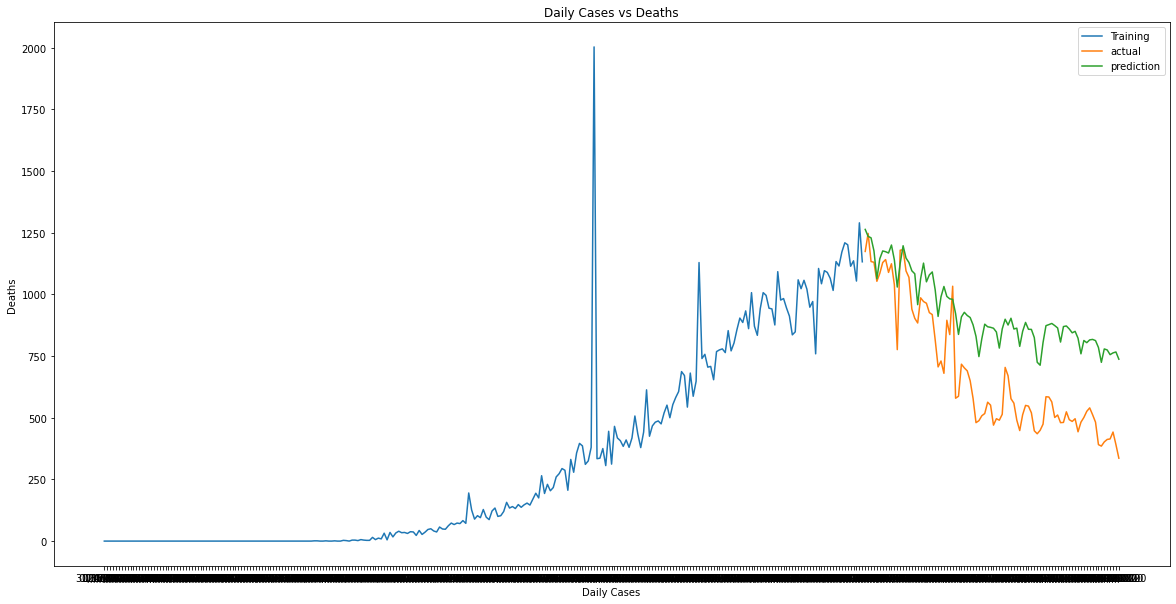

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20,10)
dftemp=covid_daily_cases.set_index('dateRep')
grouped = dftemp.groupby('countriesAndTerritories')

df = pd.DataFrame()
for name, group in grouped:
  if name=='India':
    df = group

df.info()
df = df[['day', 'month', 'year', 'cases','deaths']]
df = df.iloc[::-1]
xFrame = df.drop('deaths', axis=1)
yFrame = df['deaths']

# Splitting the dataset into the Training set and Test set
xtrain, xtest, ytrain, ytest = train_test_split(xFrame.values, yFrame.values, test_size=0.25, shuffle=False)

# Fitting Multiple Linear Regression to the Training set
model = LinearRegression()
model.fit(xtrain,ytrain)
prediction = model.predict(xtest)

# Evaluating the accuracy
print()
accuracy = model.score(xtrain,ytrain)
print(f'Accuracy: {round(accuracy*100,3)} %')
print()

# Plot the results
plt.plot(df.index[:-len(prediction)], ytrain, label = 'Training')
plt.plot(df.index[-len(prediction):], ytest, label ='actual')
plt.plot(df.index[-len(prediction):], prediction, label='prediction')
plt.xlabel('Daily Cases')
plt.ylabel('Deaths')
plt.title('Daily Cases vs Deaths')
plt.legend(loc=1)
plt.show()


#Prediction model to top 3 countries with highest vege consumption: 

#**Tajikistan, Armenia, Tunisia**

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 14/12/2020 to 01/05/2020
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   day                      228 non-null    int64 
 1   month                    228 non-null    int64 
 2   year                     228 non-null    int64 
 3   cases                    228 non-null    int64 
 4   deaths                   228 non-null    int64 
 5   countriesAndTerritories  228 non-null    object
dtypes: int64(5), object(1)
memory usage: 12.5+ KB

Accuracy: 15.832 %



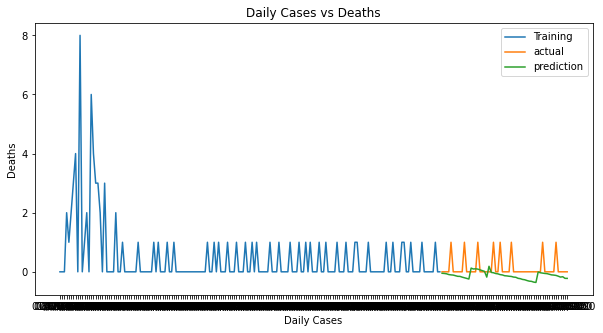

In [ ]:
#Tajikistan
df = pd.DataFrame()
for name, group in grouped:
  if name=='Tajikistan':
    df = group

plt.rcParams['figure.figsize'] = (10,5)
dftemp=covid_daily_cases.set_index('dateRep')
grouped = dftemp.groupby('countriesAndTerritories')

df.info()
df = df[['day', 'month', 'year', 'cases','deaths']]
df = df.iloc[::-1]
xFrame = df.drop('deaths', axis=1)
yFrame = df['deaths']

# Splitting the dataset into the Training set and Test set
xtrain, xtest, ytrain, ytest = train_test_split(xFrame.values, yFrame.values, test_size=0.25, shuffle=False)

# Fitting Multiple Linear Regression to the Training set
model = LinearRegression()
model.fit(xtrain,ytrain)
prediction = model.predict(xtest)

# Evaluating the accuracy
print()
accuracy = model.score(xtrain,ytrain)
print(f'Accuracy: {round(accuracy*100,3)} %')
print()

# Plot the results
plt.plot(df.index[:-len(prediction)], ytrain, label = 'Training')
plt.plot(df.index[-len(prediction):], ytest, label ='actual')
plt.plot(df.index[-len(prediction):], prediction, label='prediction')
plt.xlabel('Daily Cases')
plt.ylabel('Deaths')
plt.title('Daily Cases vs Deaths')
plt.legend(loc=1)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 341 entries, 14/12/2020 to 31/12/2019
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   day                      341 non-null    int64 
 1   month                    341 non-null    int64 
 2   year                     341 non-null    int64 
 3   cases                    341 non-null    int64 
 4   deaths                   341 non-null    int64 
 5   countriesAndTerritories  341 non-null    object
dtypes: int64(5), object(1)
memory usage: 18.6+ KB

Accuracy: 66.497 %



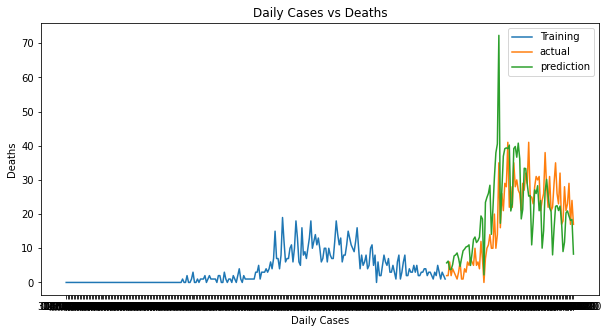

In [ ]:
#Armenia
df = pd.DataFrame()
for name, group in grouped:
  if name=='Armenia':
    df = group

plt.rcParams['figure.figsize'] = (10,5)
dftemp=covid_daily_cases.set_index('dateRep')
grouped = dftemp.groupby('countriesAndTerritories')

df.info()
df = df[['day', 'month', 'year', 'cases','deaths']]
df = df.iloc[::-1]
xFrame = df.drop('deaths', axis=1)
yFrame = df['deaths']

# Splitting the dataset into the Training set and Test set
xtrain, xtest, ytrain, ytest = train_test_split(xFrame.values, yFrame.values, test_size=0.25, shuffle=False)

# Fitting Multiple Linear Regression to the Training set
model = LinearRegression()
model.fit(xtrain,ytrain)
prediction = model.predict(xtest)

# Evaluating the accuracy
print()
accuracy = model.score(xtrain,ytrain)
print(f'Accuracy: {round(accuracy*100,3)} %')
print()

# Plot the results
plt.plot(df.index[:-len(prediction)], ytrain, label = 'Training')
plt.plot(df.index[-len(prediction):], ytest, label ='actual')
plt.plot(df.index[-len(prediction):], prediction, label='prediction')
plt.xlabel('Daily Cases')
plt.ylabel('Deaths')
plt.title('Daily Cases vs Deaths')
plt.legend(loc=1)
plt.show()


<class 'pandas.core.frame.DataFrame'>
Index: 281 entries, 14/12/2020 to 03/03/2020
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   day                      281 non-null    int64 
 1   month                    281 non-null    int64 
 2   year                     281 non-null    int64 
 3   cases                    281 non-null    int64 
 4   deaths                   281 non-null    int64 
 5   countriesAndTerritories  281 non-null    object
dtypes: int64(5), object(1)
memory usage: 15.4+ KB

Accuracy: 66.794 %



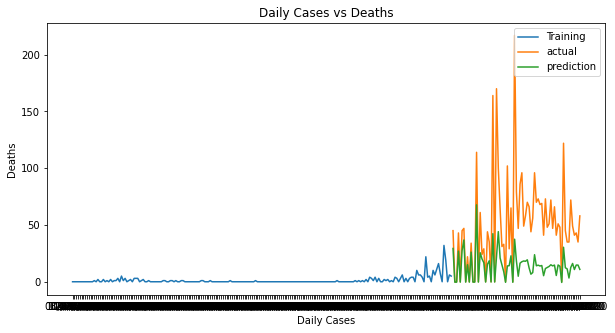

In [ ]:
#Tunisia
df = pd.DataFrame()
for name, group in grouped:
  if name=='Tunisia':
    df = group

plt.rcParams['figure.figsize'] = (10,5)
dftemp=covid_daily_cases.set_index('dateRep')
grouped = dftemp.groupby('countriesAndTerritories')

df.info()
df = df[['day', 'month', 'year', 'cases','deaths']]
df = df.iloc[::-1]
xFrame = df.drop('deaths', axis=1)
yFrame = df['deaths']

# Splitting the dataset into the Training set and Test set
xtrain, xtest, ytrain, ytest = train_test_split(xFrame.values, yFrame.values, test_size=0.25, shuffle=False)

# Fitting Multiple Linear Regression to the Training set
model = LinearRegression()
model.fit(xtrain,ytrain)
prediction = model.predict(xtest)

# Evaluating the accuracy
print()
accuracy = model.score(xtrain,ytrain)
print(f'Accuracy: {round(accuracy*100,3)} %')
print()

# Plot the results
plt.plot(df.index[:-len(prediction)], ytrain, label = 'Training')
plt.plot(df.index[-len(prediction):], ytest, label ='actual')
plt.plot(df.index[-len(prediction):], prediction, label='prediction')
plt.xlabel('Daily Cases')
plt.ylabel('Deaths')
plt.title('Daily Cases vs Deaths')
plt.legend(loc=1)
plt.show()

#Prediction model to bottom 3 countries with lowest vege consumption:

#**Haiti, Panama, Madagascar**

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 14/12/2020 to 20/03/2020
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   day                      270 non-null    int64 
 1   month                    270 non-null    int64 
 2   year                     270 non-null    int64 
 3   cases                    270 non-null    int64 
 4   deaths                   270 non-null    int64 
 5   countriesAndTerritories  270 non-null    object
dtypes: int64(5), object(1)
memory usage: 14.8+ KB

Accuracy: 21.686 %



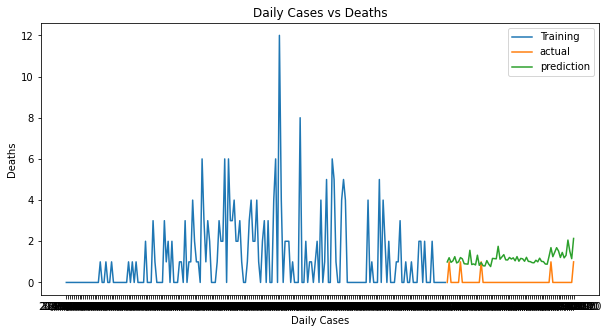

In [ ]:
#Haiti
df = pd.DataFrame()
for name, group in grouped:
  if name=='Haiti':
    df = group

plt.rcParams['figure.figsize'] = (10,5)
dftemp=covid_daily_cases.set_index('dateRep')
grouped = dftemp.groupby('countriesAndTerritories')

df.info()
df = df[['day', 'month', 'year', 'cases','deaths']]
df = df.iloc[::-1]
xFrame = df.drop('deaths', axis=1)
yFrame = df['deaths']

# Splitting the dataset into the Training set and Test set
xtrain, xtest, ytrain, ytest = train_test_split(xFrame.values, yFrame.values, test_size=0.25, shuffle=False)

# Fitting Multiple Linear Regression to the Training set
model = LinearRegression()
model.fit(xtrain,ytrain)
prediction = model.predict(xtest)

# Evaluating the accuracy
print()
accuracy = model.score(xtrain,ytrain)
print(f'Accuracy: {round(accuracy*100,3)} %')
print()

# Plot the results
plt.plot(df.index[:-len(prediction)], ytrain, label = 'Training')
plt.plot(df.index[-len(prediction):], ytest, label ='actual')
plt.plot(df.index[-len(prediction):], prediction, label='prediction')
plt.xlabel('Daily Cases')
plt.ylabel('Deaths')
plt.title('Daily Cases vs Deaths')
plt.legend(loc=1)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 14/12/2020 to 10/03/2020
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   day                      280 non-null    int64 
 1   month                    280 non-null    int64 
 2   year                     280 non-null    int64 
 3   cases                    280 non-null    int64 
 4   deaths                   280 non-null    int64 
 5   countriesAndTerritories  280 non-null    object
dtypes: int64(5), object(1)
memory usage: 15.3+ KB

Accuracy: 60.574 %



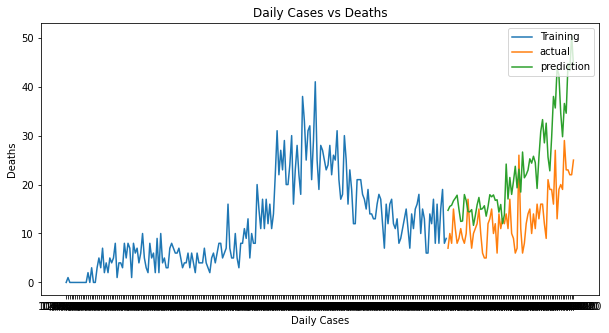

In [ ]:
#Panama
df = pd.DataFrame()
for name, group in grouped:
  if name=='Panama':
    df = group

plt.rcParams['figure.figsize'] = (10,5)
dftemp=covid_daily_cases.set_index('dateRep')
grouped = dftemp.groupby('countriesAndTerritories')

df.info()
df = df[['day', 'month', 'year', 'cases','deaths']]
df = df.iloc[::-1]
xFrame = df.drop('deaths', axis=1)
yFrame = df['deaths']

# Splitting the dataset into the Training set and Test set
xtrain, xtest, ytrain, ytest = train_test_split(xFrame.values, yFrame.values, test_size=0.25, shuffle=False)

# Fitting Multiple Linear Regression to the Training set
model = LinearRegression()
model.fit(xtrain,ytrain)
prediction = model.predict(xtest)

# Evaluating the accuracy
print()
accuracy = model.score(xtrain,ytrain)
print(f'Accuracy: {round(accuracy*100,3)} %')
print()

# Plot the results
plt.plot(df.index[:-len(prediction)], ytrain, label = 'Training')
plt.plot(df.index[-len(prediction):], ytest, label ='actual')
plt.plot(df.index[-len(prediction):], prediction, label='prediction')
plt.xlabel('Daily Cases')
plt.ylabel('Deaths')
plt.title('Daily Cases vs Deaths')
plt.legend(loc=1)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, 14/12/2020 to 21/03/2020
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   day                      269 non-null    int64 
 1   month                    269 non-null    int64 
 2   year                     269 non-null    int64 
 3   cases                    269 non-null    int64 
 4   deaths                   269 non-null    int64 
 5   countriesAndTerritories  269 non-null    object
dtypes: int64(5), object(1)
memory usage: 14.7+ KB

Accuracy: 46.27 %



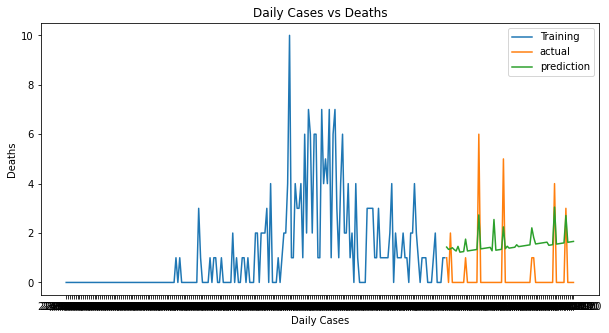

In [ ]:
#Madagascar
df = pd.DataFrame()
for name, group in grouped:
  if name=='Madagascar':
    df = group

plt.rcParams['figure.figsize'] = (10,5)
dftemp=covid_daily_cases.set_index('dateRep')
grouped = dftemp.groupby('countriesAndTerritories')

df.info()
df = df[['day', 'month', 'year', 'cases','deaths']]
df = df.iloc[::-1]
xFrame = df.drop('deaths', axis=1)
yFrame = df['deaths']

# Splitting the dataset into the Training set and Test set
xtrain, xtest, ytrain, ytest = train_test_split(xFrame.values, yFrame.values, test_size=0.25, shuffle=False)

# Fitting Multiple Linear Regression to the Training set
model = LinearRegression()
model.fit(xtrain,ytrain)
prediction = model.predict(xtest)

# Evaluating the accuracy
print()
accuracy = model.score(xtrain,ytrain)
print(f'Accuracy: {round(accuracy*100,3)} %')
print()

# Plot the results
plt.plot(df.index[:-len(prediction)], ytrain, label = 'Training')
plt.plot(df.index[-len(prediction):], ytest, label ='actual')
plt.plot(df.index[-len(prediction):], prediction, label='prediction')
plt.xlabel('Daily Cases')
plt.ylabel('Deaths')
plt.title('Daily Cases vs Deaths')
plt.legend(loc=1)
plt.show()

##Conclusion:

1. For the first question, it can be seen in the bar chart that none of the countries consume 40% of vegetables which is recommended for a balanced diet. Tajikistan's people consume almost 20% of vegetables which is the highest.
2. For the second question,the current death and total cases in countries that consume recommended amount of vegetables for their daily intakes is better as compare to those that doesn't follow the recommendation, if vegetable intake is between  15-20%, the number of total case will be less.the number of vegetable intake increase then the number of total covid case will decrease. 
3. For our third question we wanted to compare the different machine learning models to identify the best model to use for prediction in similar use cases to predict the timesearies. In our case we had use Randomforest and Linearregression. We had used the Top 3 and Bottom 3 countries according to the vegetable consumption. Our results as shown in following table clearly states that Randomforest has better accuracy and performance as compare to the linearregression. As an exmaple we got the 46.27% accuracy of predicting covid deaths in "Madagascar" using Linearregression while Randomforest has outperfomed and gives mean absolute error of 0.7 which means 99.3% accuracy. Though the numbers from Randomforest are verry efficient yet in some cases Randomforest does underperformed as in the case of India where the mean absolute value is abut 34.3 which is about 76.7% accuracy not as high as other countries. It might further be improved by fixing the model paramters and find the best suitbale paramters that can perform well in every case for this use case. 

|  Country | Accuracy (Linear Regression)  |  Mean Absolute Error (Random Forest)  |   |   |
|---|---|---|---|---|
| India  | 90.21  | 30.31  |   |   |
| Tajikistan  | 15.832  | 0.41  |   |   |
| Armenia  | 66.497  | 2.21  |  |   |
| Tunisia  | 66.79  | 6.46  |   |   |
| Haiti  | 21.68  | 0.93  |   |   |
| Panama  | 60.58  | 3.25  |   |   |
| Madagascar  | 46.27  | 0.70  |   |   |


Some other imporatnt factors that cause the models to result in low performance or accuracy is the source of data and some countries doesn't release the accurate data as oppose to others. These factors give highly diversified results, it can also be improved with higher accuracy of data. 

Due to limitation of time and resources, we able to scrab the covid data for shoarter period of time. We can further improve this by having better resource and larger amount of dataset. 

#**Reference**


* Cuiyan Wang et al., (2021, Feb 11). The impact of COVID-19 pandemic on physical and mental health of Asians: A study of seven middle-income countries in Asia. https://doi.org/10.1371/journal.pone.0246824


* Rice University. (2020, Apr 6). Six strategies for staying motivated during the COVID-19 pandemic. https://graduate.rice.edu/news-six-strategies-staying-motivated-during-covid-19-pandemic


* Matthew H. C. Mak. (2021, Oct 11). Children’s Motivation to Learn at Home During the COVID-19 Pandemic: Insights From Indian Parents. https://doi.org/10.3389/feduc.2021.744686


* University of Pittsburgh. (2021). COVID-19 Pandemic: Supervisor Tips & Tools for Motivating Remote Staff to Stay Engaged and Productive. https://www.hr.pitt.edu/news/covid-19-pandemic-supervisor-tips-tools-motivating-remote-staff-stay-engaged-and-productive


* Jennifer Cromley and Andrea Kunze. (2021). Motivational Resilience during COVID-19 across At-Risk Undergraduates. J Microbiol Biol Educ. 2021; 22(1): 22.1.46. DOI:https://doi.org/10.1128/jmbe.v22i1.2271


* Thomas K. F. Chiu et al., (2021). Motivating Online Learning: The Challenges of COVID-19 and Beyond. Asia-Pacific Edu Res. 2021 Apr 28 : 1–4. DOI
https://doi.org/10.1007/s40299-021-00566-w